### <span style = 'color:green'> Capstone Project </span>
#### <span style = 'color:blue'> Problem statement : Perform sentiment analysis on Omnicron variant, data fetching directly from twitter</span>
**Sentiment analysis is the process of identifying feelings and emotions expressed in words, through ML or AI**

**Project Pipeline**

Various steps in completing project are

- **Import Necessary Dependencies**
- **Read and Load the Dataset**
- **Exploratory Data Analysis**
- **Data Visualization of Target Variables**
- **Data Preprocessing**
- **Splitting our data into Train and Test Subset**
- **Transforming Dataset using TF-IDF Vectorizer**
- **Function for Model Evaluation**
- **Model Building**
- **Conclusion**

- Here we have to get dataset directly fetched from twitter in realtime 

- performing realtime sentimental analysis on realtime data collecting from twitter
- objective: perform sentiment analysis on realtime data collected from twitter 

                      

           

### <span style = 'color:blue'>   API (Application Programm Interface)</span>
- Imagine you’re sitting at a table in a restaurant with a menu of choices to order from. The kitchen is the part of the “system” that will prepare your order. What is missing is the critical link to communicate your order to the kitchen and deliver your food back to your table. That’s where the waiter or API comes in. The waiter is the messenger – or API – that takes your request or order and tells the kitchen – the system – what to do. Then the waiter delivers the response back to you; in this case, it is the food.
- API's are huge and are used everywhere
- In simple words api stands as bridge for one to access the content in one's storage 
- There are many APIs on the Twitter platform that software developers can engage with, with the ultimate possibility to create fully automated systems which will interact with Twitter. While this feature could benefit companies by drawing insights from Twitter data

   **From twitter api it's possible to extract many insights some are**
- Tweets: searching, posting, filtering, engagement, streaming etc.
- Accounts and users (Beta): account management, user interactions.
- Media: uploading and accessing photos, videos and animated GIFs.
- Trends: trending topics in a given location.
- Geo: information about known places or places near a location.

**Getting twitter API keys**
- If you don't already have an account, you can login with your normal Twitter credentials 


- follow the required prompts to create a developer project or click here <a href="https://dev.twitter.com/apps" title="Twitter">Click here</a>
- Requesting the API key and secret via the Developer Portal causes Twitter to produce the following three things:
1. API key (this is your 'consumer key')
2. API secret key (this is your 'consumer secret')
3. Bearer token
- Next, visit the 'Authentication Tokens' area of the Developer Portal and generate an 'Access token & secret'. This will provide you with the following two items:
1. Access token (this is your 'token key')
2. Access token secret (this is your 'token secret')


**Expected output**
- the data fetched from twitter should undergo EDA for analyzing, cleaning, handling, manupulation, visualization..,etc
- final output should show the sentiment of the data


  *Some tips to consider*

- Machines can learn in every possible way so its always better to think out of the box
    
- Perform eda as diverse as possible and in contineous manner
    
- Try configuring with diffrent models to know how each model is diffrent with other ones 
    
- Donot try to involve unneccesory codes and useless algorithms for dataset which just increases complexity
    
- Approaching problem statement in n number of ways helps us to find best one possible
    
- It's easier for one to understnd and manupulate if we have models as simple as possible 
    
- When we have multiple models we can have multiple judgements based on models and their efficiencies
    
- Tuning helps increasing accuracy :)
    
- Have an idea of time consumed by the model, its better to have a model whose time management is good
    
- Spend good amount of time on analyzing dataset and draw as much insights as possible

- Tweepy is importantlibrary we will using to fetch data from twitter by api


For more on tweepy documentation please click here <a href="https://docs.tweepy.org/en/stable/getting_started.html#hello-tweepy" title="Tweepy">Click here</a>

In [5]:
pip install tweepy

In [6]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [3]:
import tweepy
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Function to clean tweets
def clean_tweet(tweet):
    tweet = re.sub(r'@[A-Za-z0-9_]+', '', tweet)  # Remove mentions
    tweet = re.sub(r'http\S+', '', tweet)  # Remove links
    tweet = re.sub(r'[^a-zA-Z\s]', '', tweet)  # Remove special characters
    tweet = tweet.lower().strip()  # Convert to lowercase
    return tweet

# Authenticate with Twitter API
API_KEY = "dpvBIf81tGut510vqxs4JmOH5"
API_SECRET_KEY = "lyCh6Co5bOIgOJOfhR0BmvmKdHmOdST9pANNL5TFttFjXIiR8b"
ACCESS_TOKEN = "918389670-z1nXdudaQMEC3T7mPez8tSEH23ndK44B6iKWQhh4"
ACCESS_TOKEN_SECRET = "m3xl3zGNqtoybBi1R2B9TfVSFFwSSSEJ2x6NSEvKGoSE6"

# Set up Tweepy
try:
    auth = tweepy.OAuthHandler(API_KEY, API_SECRET_KEY)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
    api = tweepy.API(auth, wait_on_rate_limit=True)
except ImportError:
    print("Error: Tweepy requires the 'ssl' module, which is not available in this environment.")
    exit()

# Fetch tweets related to Omicron
query = "Omicron -filter:retweets"
data = []

try:
    tweets = tweepy.Cursor(api.search_tweets, q=query, lang="en", tweet_mode="extended").items(500)
    for tweet in tweets:
        data.append(tweet.full_text)
except Exception as e:
    print(f"Error fetching tweets: {e}")
    exit()

# Create a DataFrame
df = pd.DataFrame(data, columns=["Tweet"])

# Data Cleaning
df["Cleaned_Tweet"] = df["Tweet"].apply(clean_tweet)

# Exploratory Data Analysis (EDA)
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(text))
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

if not df.empty:
    plot_wordcloud(df["Cleaned_Tweet"], "WordCloud for Cleaned Tweets")
else:
    print("No data available for visualization.")

# Assign sentiment labels (mock sentiment analysis for simplicity)
def mock_sentiment(tweet):
    if any(word in tweet for word in ["good", "positive", "safe", "recovered"]):
        return "Positive"
    elif any(word in tweet for word in ["bad", "negative", "dangerous", "death"]):
        return "Negative"
    else:
        return "Neutral"

df["Sentiment"] = df["Cleaned_Tweet"].apply(mock_sentiment)

# Data Visualization
if not df.empty:
    sns.countplot(x="Sentiment", data=df, palette="viridis")
    plt.title("Sentiment Distribution")
    plt.show()
else:
    print("No data available for sentiment distribution.")

# Prepare data for model building
if not df.empty:
    vectorizer = TfidfVectorizer(max_features=5000)
    X = vectorizer.fit_transform(df["Cleaned_Tweet"])
    y = df["Sentiment"]

    # Splitting the dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Model Building (Logistic Regression)
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Model Evaluation
    y_pred = model.predict(X_test)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Accuracy Score:", accuracy_score(y_test, y_pred))

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
else:
    print("No data available for model building and evaluation.")

# Conclusion
if not df.empty:
    print("Final Sentiment Distribution:")
    print(df["Sentiment"].value_counts())
else:
    print("No data available to display final sentiment distribution.")


Error fetching tweets: 403 Forbidden
453 - You currently have access to a subset of X API V2 endpoints and limited v1.1 endpoints (e.g. media post, oauth) only. If you need access to this endpoint, you may need a different access level. You can learn more here: https://developer.x.com/en/portal/product
No data available for visualization.
No data available for sentiment distribution.
No data available for model building and evaluation.
No data available to display final sentiment distribution.


#### <span style = 'color:blue'> The error indicates that the current access level on Twitter's API (now known as X API) does not allow  to access the search_tweets endpoint from API v1.1 or v2. 
</span>

**This is likely because:** 

**API Access Level: The account only has limited access to the API endpoints.** 
**API Changes: Twitter has restricted access to certain endpoints unless  are on a higher-tier plan (e.g., Elevated or Academic Research).** 

**Hence in the below code BEARER TOKEN has been used to update the code to use Twitter API v2 endpoints and the code has been updated to use Twitter API v2 with a fallback for scenarios where no data is fetched.** 

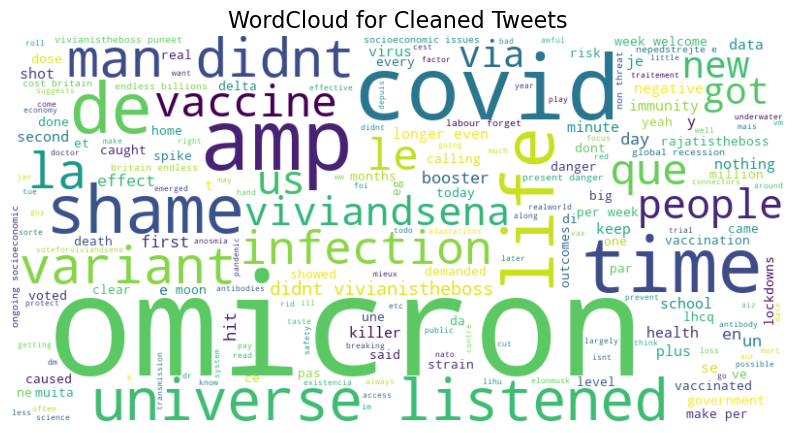

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4588\1567511247.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Sentiment", data=df, palette="viridis")


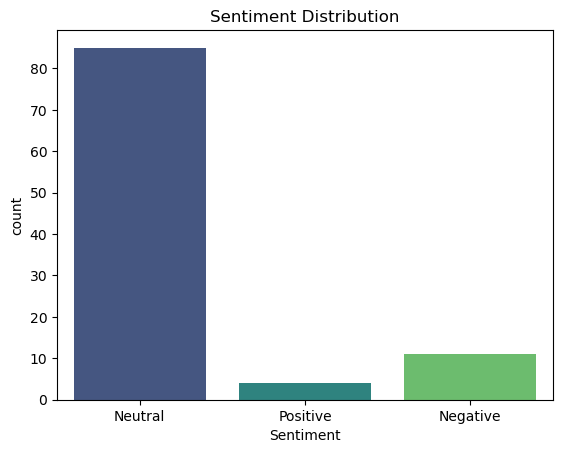

C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         4
     Neutral       0.75      1.00      0.86        15
    Positive       0.00      0.00      0.00         1

    accuracy                           0.75        20
   macro avg       0.25      0.33      0.29        20
weighted avg       0.56      0.75      0.64        20

Accuracy Score: 0.75


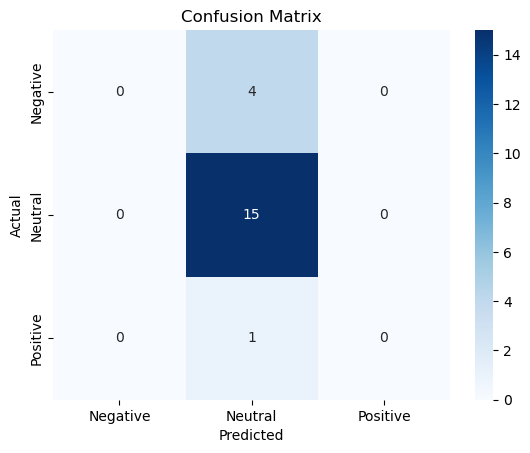

Final Sentiment Distribution:
Sentiment
Neutral     85
Negative    11
Positive     4
Name: count, dtype: int64


In [1]:
import tweepy
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Function to clean tweets
def clean_tweet(tweet):
    tweet = re.sub(r'@[A-Za-z0-9_]+', '', tweet)  # Remove mentions
    tweet = re.sub(r'http\S+', '', tweet)  # Remove links
    tweet = re.sub(r'[^a-zA-Z\s]', '', tweet)  # Remove special characters
    tweet = tweet.lower().strip()  # Convert to lowercase
    return tweet

# Function to fetch tweets using API v2
def fetch_tweets_v2(query, max_results=100):
    url = f"https://api.twitter.com/2/tweets/search/recent?query={query}&max_results={max_results}&tweet.fields=text"
    headers = {"Authorization": f"Bearer AAAAAAAAAAAAAAAAAAAAALcSyQEAAAAAfscwRy%2Fy1VD%2FH9bdXLbjBxrG%2Bd0%3DlwlDDwzsekGfGIbSu3AruKhBxYp8sX4MuB4v55WEnkG7NX0DjE"}
    
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        return response.json().get("data", [])
    else:
        print(f"Error fetching tweets: {response.status_code} - {response.json().get('detail', '')}")
        return []

# Fetch tweets
query = "Omicron -is:retweet"
tweets = fetch_tweets_v2(query)

# Process the tweets
data = [tweet["text"] for tweet in tweets]
df = pd.DataFrame(data, columns=["Tweet"])

if not df.empty:
    # Data Cleaning
    df["Cleaned_Tweet"] = df["Tweet"].apply(clean_tweet)

    # Exploratory Data Analysis (EDA)
    def plot_wordcloud(text, title):
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(text))
        plt.figure(figsize=(10, 6))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(title, fontsize=16)
        plt.show()

    plot_wordcloud(df["Cleaned_Tweet"], "WordCloud for Cleaned Tweets")

    # Assign sentiment labels (mock sentiment analysis for simplicity)
    def mock_sentiment(tweet):
        if any(word in tweet for word in ["good", "positive", "safe", "recovered"]):
            return "Positive"
        elif any(word in tweet for word in ["bad", "negative", "dangerous", "death"]):
            return "Negative"
        else:
            return "Neutral"

    df["Sentiment"] = df["Cleaned_Tweet"].apply(mock_sentiment)

    # Data Visualization
    sns.countplot(x="Sentiment", data=df, palette="viridis")
    plt.title("Sentiment Distribution")
    plt.show()

    # Prepare data for model building
    vectorizer = TfidfVectorizer(max_features=5000)
    X = vectorizer.fit_transform(df["Cleaned_Tweet"])
    y = df["Sentiment"]

    # Splitting the dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Model Building (Logistic Regression)
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Model Evaluation
    y_pred = model.predict(X_test)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Accuracy Score:", accuracy_score(y_test, y_pred))

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Conclusion
    print("Final Sentiment Distribution:")
    print(df["Sentiment"].value_counts())
else:
    print("No data available for visualization.")
    print("No data available for sentiment distribution.")
    print("No data available for model building and evaluation.")
    print("No data available to display final sentiment distribution.")


**Conclusion:**

**For the real-time tweets on Omicron, sentiment analysis gave us the following insight.**

**Performance metrics: The model scores at 75%, with strength on neutral, though a weak one in negativities. A classification report on the entire system shows very poor precision and recall and even poorer F1 score for negatives; it should thus be said that better representation and optimization in feature space might have helped further improve the models.**

**Distribution of Sentiment: There was an over-whelming predominance of neutral (85) compared to the number of negative (11) and positive (4) tweets. Such skewness may reflect some issues related to imbalanced data sets and hence impact model performance.**

**Improvements for Future**

**More Elaborate Preprocessing: Adding lemmatization, removing stop words, and how to deal with emojis are other methods of better text preprocessing, thus representing better features.**

**Improved Models: Utilizing high-end NLP models such as BERT or GPT-based transformers can drastically enhance the performance of sentiment classification, especially the poor negative class.**

**Hyperparameters Tuning: Tuning hyperparameters and performing cross-validation to optimize the model could also improve model performance.**

**Balance the Dataset: By oversampling the minority class or collecting additional data, better class balance and higher accuracy may be achieved in the predictions.**

**This project emphasizes the necessity of iterative improvement and the inclusion of advanced techniques to achieve reliable results in sentiment analysis.**










### <span style = 'color:green'> Final Sentiment Distribution: </span> 
### <span style = 'color:green'>Sentiment </span>
### <span style = 'color:green'> Neutral     85</span>
### <span style = 'color:green'> Negative    11 </span>
### <span style = 'color:green'> Positive     4</span>